Памперсы или пиво? Практический проект по созданию рекомендательной системы.
Цель: Настало время поработать с данными самой большой и самой дорогой компании, занимающейся, похоже, уже всем на свете: от продажи всего и вся, до настройки облачных инфраструктур и создания роботов. Конечно же это компания Джеффа могу-купить-весь-мир Безоса - Amazon.

1.Выберите любой понравившийся вам набор данных по ссылке https://nijianmo.github.io/amazon/index.html, стоит обратить внимание на раздел "Small" subsets for experimentation, где представлены не самые большие датасеты (чтобы и в память поместился, и считался недолго)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from scipy.sparse import csr_matrix
import datetime

In [2]:
url="http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Software.csv"
df=pd.read_csv(url)

In [3]:
df.head(10)

,0077613252,A240ORQ2LF9LUI,4.0,1394496000
0,0077613252,A1YCCU0YRLS0FE,4.0,1393113600
1,0077613252,A1BJHRQDYVAY2J,1.0,1392595200
2,0077613252,APRDVZ6QBIQXT,3.0,1392595200
3,0077775473,A2JZTTBSLS1QXV,5.0,1381708800
4,0132147556,AGN3T5ERYJN5A,4.0,1313366400
5,0132147556,AHPK2GD0SQC59,3.0,1286582400
6,0132147556,A35UC8LHA6TILH,5.0,1286064000
7,0132147556,A2IH0AJPR7IWG3,5.0,1286064000
8,0132147556,AL87GELNJGOH3,5.0,1274572800
9,0132147556,A1CUJ6ZT82H7LS,2.0,1241308800


In [4]:
df.columns = ['asin', 'reviewerID', 'overall', 'unixReviewTime']

In [5]:
df = df.sort_values(by=['unixReviewTime'])

In [6]:
df.tail(10)

,asin,reviewerID,overall,unixReviewTime
458767,B01EB06QUM,A1JWEJ8SBX44X5,1.0,1537574400
459194,B01G1KFQXS,A2EEV3TT7PZD2E,1.0,1537574400
458929,B01EYEJQBG,A1J89TODYY8RBH,5.0,1537574400
459376,B01HAP3NJM,A3HCDCB1UO7EOZ,3.0,1537660800
459335,B01H10L9QU,A1A6HJMP7EYSYS,1.0,1537747200
459056,B01FBH8Q0C,A1Y5JLM1NOQOS,5.0,1537920000
458988,B01F70HHBC,A3ABW7RWERHVT,5.0,1537920000
459346,B01H39M7ME,AK2IG0QYBFLXL,5.0,1538352000
459328,B01GWG6YUA,A3PL0JBSTH8ED1,5.0,1538352000
459327,B01GWG6YUA,ANL4WPP7M48RZ,1.0,1538438400


In [7]:
df.tail(10)

,asin,reviewerID,overall,unixReviewTime
458767,B01EB06QUM,A1JWEJ8SBX44X5,1.0,1537574400
459194,B01G1KFQXS,A2EEV3TT7PZD2E,1.0,1537574400
458929,B01EYEJQBG,A1J89TODYY8RBH,5.0,1537574400
459376,B01HAP3NJM,A3HCDCB1UO7EOZ,3.0,1537660800
459335,B01H10L9QU,A1A6HJMP7EYSYS,1.0,1537747200
459056,B01FBH8Q0C,A1Y5JLM1NOQOS,5.0,1537920000
458988,B01F70HHBC,A3ABW7RWERHVT,5.0,1537920000
459346,B01H39M7ME,AK2IG0QYBFLXL,5.0,1538352000
459328,B01GWG6YUA,A3PL0JBSTH8ED1,5.0,1538352000
459327,B01GWG6YUA,ANL4WPP7M48RZ,1.0,1538438400


2.Проведите базовый EDA - распределения рейтингов, количество уникальных товаров и т.д

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459435 entries, 413423 to 459327
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            459435 non-null  object 
 1   reviewerID      459435 non-null  object 
 2   overall         459435 non-null  float64
 3   unixReviewTime  459435 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 17.5+ MB


In [9]:
df.isnull().sum()

asin              0
reviewerID        0
overall           0
unixReviewTime    0
dtype: int64

In [10]:
software_user = df.groupby('asin')['reviewerID'].count()

In [11]:
#Кол-во уникальных товаров
df['asin'].nunique()

21663

In [12]:
#Кол-во уникальных пользователей
df['reviewerID'].nunique()

375146

In [13]:
df.count()

asin              459435
reviewerID        459435
overall           459435
unixReviewTime    459435
dtype: int64

In [14]:
df['overall'].nunique()

5

In [15]:
df['overall'].unique()

array([1., 5., 4., 2., 3.])

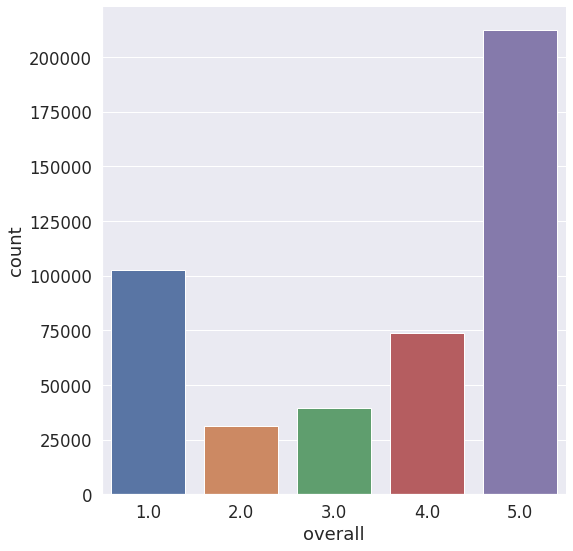

In [16]:
#Распределение рейтингов
sns.set(font_scale=1.5)
sns.catplot("overall", data=df, kind="count", height=8)

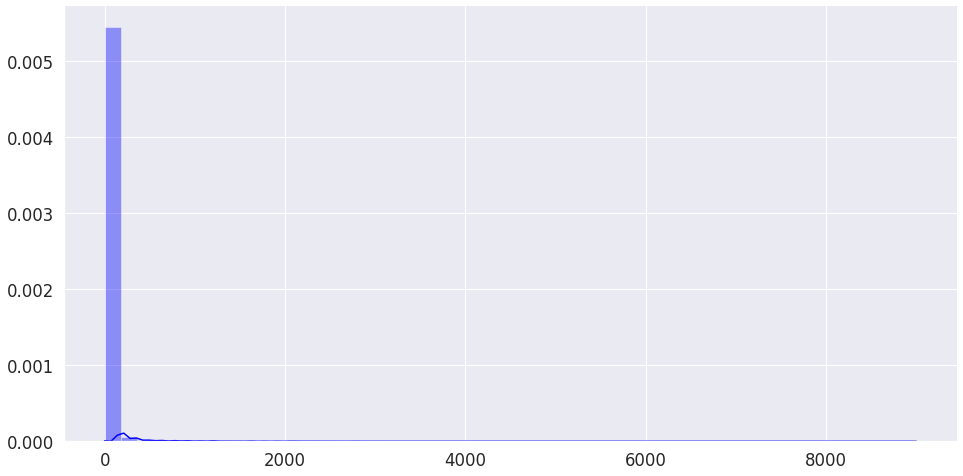

In [17]:
plt.figure(figsize=(16, 8))
sns.distplot(software_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [18]:
print(f"A software for an average of {np.mean(software_user)} users, with minimum {np.min(software_user)} and maximum {np.max(software_user)} users")

A software for an average of 21.20828140146794 users, with minimum 1 and maximum 8994 users


Уже понятно, что мы работаем с очень разреженной матрицей. Потребуется, много оперативной памяти и ресурсов для операций над подобной матрицей. Для того, чтобы облегчить вычисления, попробуем выбрать снова всех тех юзеров, которые оценивали, как минимум 5 програмных обеспечений. Более того, мы собираемся выбирать програмное обеспечение, которое было оценено не менее чем 20 пользователями.

In [19]:
# сколько песен слушал пользователь
user_counts = df.groupby('reviewerID')['asin'].count()

# Фильтрация юзеров с 16 песнями
user_id = user_counts[user_counts > 5].index.to_list()

In [20]:
# Сколько оценивали пользователей
sw_counts = df.groupby('asin')['reviewerID'].count()

# Оценено больше 20 пользователями
sw_id = sw_counts[sw_counts > 20].index.to_list()

In [21]:
# Фильтрация набора
df_reduced = df[(df['reviewerID'].isin(user_id)) & (df['asin'].isin(sw_id))]

In [22]:
df_reduced.shape

(14964, 4)

In [23]:
df_reduced.head(10)

,asin,reviewerID,overall,unixReviewTime
4027,B00003JAU7,A1KJ94X41TJLX0,1.0,950745600
4154,B00003ZANM,A1M5P9TYPKHYLF,4.0,952128000
4137,B00003JAU7,A3C1MJ6AYAJ1PP,4.0,952387200
3657,B00002SFM4,AJPH8OQSWKR7K,4.0,955324800
3731,B00002SA8D,A243HY69GIAHFI,4.0,956016000
3650,B00002SFM4,AZWTRKAX60DLB,2.0,957744000
3646,B00002SFM4,A3C1MJ6AYAJ1PP,1.0,958435200
2972,B00000K4KT,AT2BYFEVLVITT,5.0,958694400
4340,B00004TYCR,A2G0O4Y8QE10AE,5.0,961977600
3045,B00001XDWZ,A15IZQLN9J5CCQ,5.0,963705600


In [24]:
bins = [0, 1, 2, 3, 4, 5]

In [25]:
df_reduced['overall'] = pd.cut(df_reduced['overall'], bins=bins, labels=[1, 2, 3, 4, 5])

/home/nata/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
overall_counts = pd.DataFrame(df_reduced.groupby('overall').size(), columns=['count']).reset_index(drop=False)

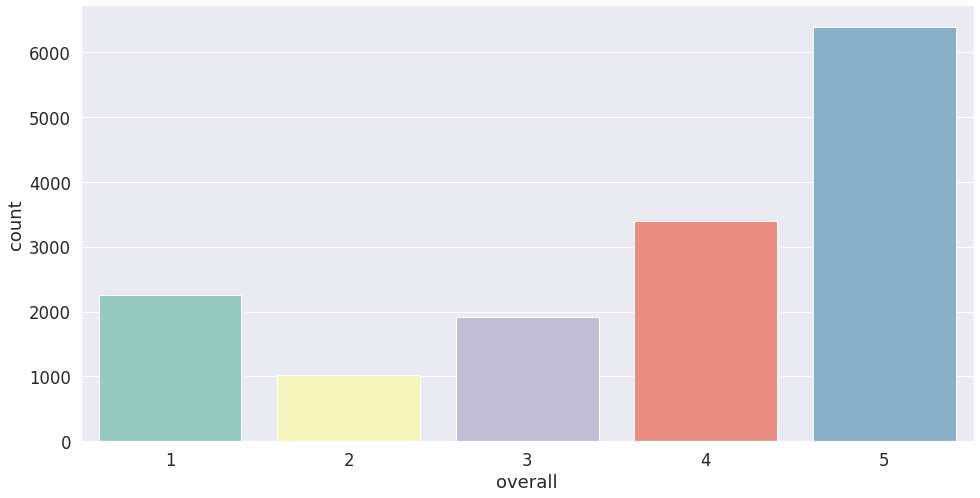

In [27]:
plt.figure(figsize=(16, 8))
sns.barplot(x='overall', y='count', palette='Set3', data=overall_counts)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [28]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_reduced[['reviewerID', 'asin', 'overall']], reader)

3.Отложите часть данных для тестирования. В рекомендательных системах для этого можно случайным образом “занулить” желаемый процент рейтингов в исходном датасете, чтобы получить “тренировочный набор”, и проверять качество ваших рекомендаций на этих уже не зануленных рейтингах. При этом, если у вас есть временная зависимость в данных, имеет смысл занулять рейтинги “из будущего”, чтобы обучаться на “исторических” покупках/просмотрах и т.д.

In [29]:
def timeseries_train_test_split(X, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    test_index = int(len(X)*(1-test_size))
    X_train = X
    X_train.loc[test_index:, 'overall'] = 0
    X_test = X.iloc[test_index:]
    
    
    return X_train, X_test

In [30]:
trainset, testset = train_test_split(data, test_size=.25)

Мы будем использовать встроенную функцию для SVD. Для операции подбора гиперпараметров, будем использовать GridSearchCV, поскольку пространство поиска (количество параметров и их диапазон) не очень велики.

In [ ]:
param_grid = {'n_factors': [160], 
              'n_epochs': [100], 
              'lr_all': [0.001, 0.005],
              'reg_all': [0.08, 0.1]}

In [ ]:
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=4, n_jobs=-2)

In [ ]:
# ищем лучшие гиперпараметры модели
grid_search_svd.fit(data)
find_algo = grid_search_svd.best_estimator['rmse']
print(grid_search_svd.best_score['rmse'])
print(grid_search_svd.best_params['rmse'])

In [ ]:
# кросс-валидируем
cross_validate(find_algo, data, measures=['RMSE'], cv=5, verbose=True)

In [ ]:
final_algorithm = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.08)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")